In [1]:
import numpy as np
import dimarray as da
from matplotlib import pylab as plt
from matplotlib import ticker, cm, colors
import cmocean
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import os
import matplotlib.pyplot as pl

In [2]:
sia_e = 3.0
q =0.6
ssa_n = 3.0
GT_to_SLR=1/(1000*360)*1/12
output_proj = '/home/beckmann/mnt/cluhome/exp_pism/pdd_runs/projection_runs/4500m/'
spin_up =  '/home/beckmann/mnt/cluhome/exp_pism/pdd_runs/spin_up/4500m/paleo_1ka_0a_'+'sia_e_'+str(sia_e)+'_q_'+str(q)+'_ssa_n_'+str(ssa_n)+'/gris_4500m.nc'
bed_orig = '/home/beckmann/mnt/cluhome/exp_pism/my_first_runs/input_data/pism_Greenland_4500m_mcb_jpl_v_no_bath_plus_beddef.nc'
input_beds = '/home/beckmann/mnt/cluhome/icedata/pism_greenland_input/BedMachine/'
ftt_file =input_beds+'ftt_4500m.nc'
ctrl =  '/home/beckmann/mnt/cluhome/exp_pism/pdd_runs/spin_up/4500m/ctrl_sia_e_'+str(sia_e)+'_q_'+str(q)+'_ssa_n_'+str(ssa_n)+'/'

In [3]:
def make_levels(values,leb):
    a = np.nanmax([np.nanmax(values),-1*np.nanmin(values)])
    return(np.arange(-1*a,a,leb))
def make_levels_own(a,leb):
   
    return(np.arange(-1*a,a+1,leb))

def title_fig_lin_vel_anom_bar(d,ax,vmin,vmax,clmap=None):    
    lev1 =one_fig_anom_varibale_linear(ax,d,vmin,vmax, clmap)
    cbar=f.colorbar(lev1,ticks=[vmin,d.values.min(),0,d.values.max(),vmax],label ='m',ax =ax,orientation='vertical')
    ax.set_title('ice velocity change',fontsize=fs-2)
    
def one_fig_anom_varibale_linear(ax,d,vmin,vmax,clmap=None):
    if clmap is not None:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()),\
                       origin='lower',cmap=plt.get_cmap(clmap),\
                       vmin=vmin,vmax=vmax, norm=MidpointNormalize(vmin, vmax, 0.))
    else:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()), \
                   origin='lower',cmap=cmocean.cm.ice,vmin=vmin,vmax=vmax)
        ax.contour(d.x,d.y,d.values[0,:],levels=[2000],colors='red')
    return cay
class MidpointNormalize(colors.Normalize):
    """Normalise the colorbar."""
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
# ONLY grounded and floating ice
def diff_2d_exp_ctrl(i,vthk=500,vvel=50):
    vel0 = da.read_nc(ctrl+'gris_4500m.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','velsurf_mag')
    thk0 = da.read_nc(ctrl+'gris_4500m.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','thk')
    m1 = da.read_nc(ctrl+'gris_4500m.nc','mask')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    # mth = thk1.values[0,] >100
    # msk = msk0 + mks00 +mth
    msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[0].set_title('Velocity change '+files[i]+'- ctrl ')
    css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
    ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[1].set_title('Thickness change')
    csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[0])
    f.colorbar(csc, ax = ax[1])
    # ax3.
def diff_2d_exp_exp(j,i,vthk=500,vvel=50):
    vel0 = da.read_nc(output_proj+files[j]+'gris_4500.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','velsurf_mag')
    
    thk0 = da.read_nc(output_proj+files[j]+'gris_4500.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','thk')
    m1 = da.read_nc(ctrl+'gris_4500m.nc','mask')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    # mth = thk1.values[0,] >100
    # msk = msk0 + mks00 +mth
    msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[0].set_title('Velocity change '+files[i]+'-'+files[j])
    css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
    ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[1].set_title('Thickness change')
    csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[0])
    f.colorbar(csc, ax = ax[1])
    # ax3.
    
def title_fig_lin_vel_anom_bar(d,ax,vmin,vmax,clmap=None):    
    lev1 =one_fig_anom_varibale_linear(ax,d,vmin,vmax, clmap)
    cbar=f.colorbar(lev1,ticks=[vmin,d.values.min(),0,d.values.max(),vmax],label ='m',ax =ax,orientation='vertical')
    ax.set_title('ice velocity change',fontsize=fs-2)
    
def one_fig_anom_varibale_linear(ax,d,vmin,vmax,clmap=None):
    if clmap is not None:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()),\
                       origin='lower',cmap=plt.get_cmap(clmap),\
                       vmin=vmin,vmax=vmax, norm=MidpointNormalize(vmin, vmax, 0.))
    else:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()), \
                   origin='lower',cmap=cmocean.cm.ice,vmin=vmin,vmax=vmax)
        ax.contour(d.x,d.y,d.values[0,:],levels=[2000],colors='red')
    return cay
class MidpointNormalize(colors.Normalize):
    """Normalise the colorbar."""
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
    
    
# ONLY grounded and floating ice
def diff_2d_exp_ctrl_thk_no(i,vthk=500,vvel=50,thk_no=5):
    '''Thickness below 5m is no ice'''
    vel0 = da.read_nc(ctrl+'gris_4500m.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','velsurf_mag')
    thk0 = da.read_nc(ctrl+'gris_4500m.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','thk')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    mth = thk1.values[0,] >thk_no
    #msk_b = msk0 + mks00 
    msk =  mth
    #msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[0].set_title('Velocity change '+files[i]+'- ctrl ')
    css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
    ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[1].set_title('Thickness change')
    csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[0])
    f.colorbar(csc, ax = ax[1])
    # ax3.
def diff_2d_exp_exp(j,i,vthk=500,vvel=50):
    m1 = da.read_nc(ctrl+'gris_4500m.nc','mask')
    vel0 = da.read_nc(output_proj+files[j]+'gris_4500.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','velsurf_mag')
    
    thk0 = da.read_nc(output_proj+files[j]+'gris_4500.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','thk')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    # mth = thk1.values[0,] >100
    # msk = msk0 + mks00 +mth
    msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[0].set_title('Velocity change '+files[i]+'-'+files[j])
    css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
    ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[1].set_title('Thickness change')
    csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[0])
    f.colorbar(csc, ax = ax[1])
    # ax3.
    return(ax)


def create_nc_monthly_variable_1d(exp,varibale,fname,dim_name):
    months = np.arange(len(exp))

    slr_po=da.DimArray(exp.tolist(),axes = [months],dims = ['months'])
    month=da.DimArray(months.tolist(),axes = [months],dims = ['months'])
#     month_co=da.DimArray(mons_cons.tolist(),axes = [mons_cons],dims = ['months'])
#     year_date=da.DimArray(years_mon.tolist(),axes = [mons_cons],dims = ['months'])
#     dim_name = my_vari_name(variable)
    dataset =da.Dataset({variable:slr_po})
    print(output_proj+fname+dim_name)
    dataset.write_nc(output_proj+fname+dim_name)

In [4]:
def make_ticklabels_invisible(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        for tl in ax.get_xticklabels() + ax.get_yticklabels():
            tl.set_visible(False)

def create_monthly_variable(exp,variable = 'sea_level_rise_potential'):
    yr_end = 130

    years_mon=[]
    mons_cons=np.arange(1,12*(yr_end)+1,1)
    months = [1,2,3,4,5,6,7,8,9,10,11,12]
    mons=months*(yr_end )
    slr_pot=np.zeros(len(mons_cons))
    for i in range(1,yr_end+1):
             
        years_mon.extend([1979+(i-1)]*12)

        name = 'ts_y'+str(i)+'gris_4500.nc'
        d = da.read_nc(output_proj+exp+name,variable)
        slr_pot[(i-1)*12:12*i]=d.values
    return(slr_pot,mons_cons,np.asarray(mons),np.asarray(years_mon))
def my_vari_name(variable):
    if variable == 'sea_level_rise_potential':
        dim_name ='slr_pot'
    if variable == 'tendency_of_ice_mass_due_to_surface_mass_flux':
        dim_name='smb'
    if variable=='tendency_of_ice_mass_due_to_discharge':
        dim_name='discharge'
    if variable=='tendency_of_ice_mass':
        dim_name='ice_mass'
    if variable=='tendency_of_ice_mass_due_to_flow':
        dim_name='ice_flow'
    if variable == 'tendency_of_ice_mass_due_to_conservation_error':
        dim_name='ice_error'
    if variable == 'tendency_of_ice_mass_due_to_basal_mass_flux':
        dim_name = 'basal_ice_flux'
    if variable == 'ice_area_glacierized':
        dim_name = 'ice_area'
        
    return(dim_name)

def create_nc_monthly_variable(exp,variable = 'sea_level_rise_potential'):
    slr_pot, mons_cons, mons, years_mon = create_monthly_variable(exp,variable)

    slr_po=da.DimArray(slr_pot.tolist(),axes = [mons_cons],dims = ['months'])
    month=da.DimArray(mons.tolist(),axes = [mons_cons],dims = ['months'])
    month_co=da.DimArray(mons_cons.tolist(),axes = [mons_cons],dims = ['months'])
    year_date=da.DimArray(years_mon.tolist(),axes = [mons_cons],dims = ['months'])
    dim_name = my_vari_name(variable)
    dataset =da.Dataset({dim_name:slr_po,'consec_months':month_co,'date_month':month, 'date_year':year_date})
    save_file = '/home/beckmann/mnt/cluhome/icedata/AtmoIce/sea_ice/'
    dataset.write_nc(output_proj+exp+dim_name+'_timeline.nc')

def load_nc_monthly_variable(exp,variable= 'sea_level_rise_potential'):
    dim_name = my_vari_name(variable)
    d = da.read_nc(output_proj+exp+dim_name+'_timeline.nc')
    return(d[dim_name].values,d.months, d['date_year'].values)

def load_yearly_nc(exp,variable = 'sea_level_rise_potential'):
    name = 'ts_gris_4500m.nc'
    d = da.read_nc(output_proj+exp+name,variable)
    return d
#tendency_of_ice_mass_due_to_surface_mass_flux
#tendency_of_ice_mass_due_to_discharge
def time_for_plot_yearly(exp,variable =  'sea_level_rise_potential'):
    d =load_yearly_nc(exp,variable)
    tt=np.arange(6,6+12*len(d.time),12)
    return (d.values, tt)

def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights,'same')
    return sma
def ext_line(ax,learn_year=2012,freq=7):
    y1,y2 =ax.get_ybound()
    ext =np.arange(learn_year+6/12,2100+6/12,freq)
    for ex in ext:
        ax.plot((ex,ex),(y1,y2),'k--', alpha=0.4)
GT_to_SLR=1/(1000*360)*1/12


In [5]:
from matplotlib import ticker, cm, colors

def make_levels(values,leb):
    a = np.nanmax([np.nanmax(values),-1*np.nanmin(values)])
    return(np.arange(-1*a,a,leb))
def make_levels_own(a,leb):
   
    return(np.arange(-1*a,a+1,leb))

def title_fig_lin_vel_anom_bar(d,ax,vmin,vmax,clmap=None):    
    lev1 =one_fig_anom_varibale_linear(ax,d,vmin,vmax, clmap)
    cbar=f.colorbar(lev1,ticks=[vmin,d.values.min(),0,d.values.max(),vmax],label ='m',ax =ax,orientation='vertical')
    ax.set_title('ice velocity change',fontsize=fs-2)
    
def one_fig_anom_varibale_linear(ax,d,vmin,vmax,clmap=None):
    if clmap is not None:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()),\
                       origin='lower',cmap=plt.get_cmap(clmap),\
                       vmin=vmin,vmax=vmax, norm=MidpointNormalize(vmin, vmax, 0.))
    else:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()), \
                   origin='lower',cmap=cmocean.cm.ice,vmin=vmin,vmax=vmax)
        ax.contour(d.x,d.y,d.values[0,:],levels=[2000],colors='red')
    return cay
class MidpointNormalize(colors.Normalize):
    """Normalise the colorbar."""
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
# ONLY grounded and floating ice
def diff_2d_exp_ctrl(i,title,vthk=500,vvel=50):
    vel0 = da.read_nc(ctrl+'gris_4500m.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'y130gris_4500.nc','velsurf_mag')
    thk0 = da.read_nc(ctrl+'gris_4500m.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'y130gris_4500.nc','thk')
    m1 = da.read_nc(ctrl+'gris_4500m.nc','mask')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    # mth = thk1.values[0,] >100
    # msk = msk0 + mks00 +mth
    msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[1].set_title('Velocity change')
    css=ax[1].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
#     ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[0].set_title('Thickness change')
    csc=ax[0].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[1],label = '(m/a)')
    f.colorbar(csc, ax = ax[0],label = '(m)')
    ax[0].set_axis_off()
    ax[1].set_axis_off()
    f.suptitle(title)
    return(f)
    # ax3.
def diff_2d_exp_exp(j,i,vthk=500,vvel=50):
    vel0 = da.read_nc(output_proj+files[j]+'y130gris_4500.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'y130gris_4500.nc','velsurf_mag')
    
    thk0 = da.read_nc(output_proj+files[j]+'y130gris_4500.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'y130gris_4500.nc','thk')
    m1 = da.read_nc(ctrl+'gris_4500m.nc','mask')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    # mth = thk1.values[0,] >100
    # msk = msk0 + mks00 +mth
    msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[0].set_title('Velocity change '+files[i]+'-'+files[j])
    css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
#     ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[1].set_title('Thickness change')
    csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[0])
    f.colorbar(csc, ax = ax[1])
    return(f,vel1.values[0,]-vel0.values[0,],thk1.values[0,]-thk0.values[0,] )
    # ax3.
    
def title_fig_lin_vel_anom_bar(d,ax,vmin,vmax,clmap=None):    
    lev1 =one_fig_anom_varibale_linear(ax,d,vmin,vmax, clmap)
    cbar=f.colorbar(lev1,ticks=[vmin,d.values.min(),0,d.values.max(),vmax],label ='m',ax =ax,orientation='vertical')
    ax.set_title('ice velocity change',fontsize=fs-2)
    
def one_fig_anom_varibale_linear(ax,d,vmin,vmax,clmap=None):
    if clmap is not None:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()),\
                       origin='lower',cmap=plt.get_cmap(clmap),\
                       vmin=vmin,vmax=vmax, norm=MidpointNormalize(vmin, vmax, 0.))
    else:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()), \
                   origin='lower',cmap=cmocean.cm.ice,vmin=vmin,vmax=vmax)
        ax.contour(d.x,d.y,d.values[0,:],levels=[2000],colors='red')
    return cay
class MidpointNormalize(colors.Normalize):
    """Normalise the colorbar."""
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
    
    
# ONLY grounded and floating ice
def diff_2d_exp_ctrl_thk_no(i,vthk=500,vvel=50,thk_no=5):
    '''Thickness below 5m is no ice'''
    vel0 = da.read_nc(ctrl+'gris_4500m.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','velsurf_mag')
    thk0 = da.read_nc(ctrl+'gris_4500m.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','thk')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    mth = thk1.values[0,] >thk_no
    #msk_b = msk0 + mks00 
    msk =  mth
    #msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[0].set_title('Velocity change')
    css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
#     ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[1].set_title('Thickness change')
    csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[0])
    f.colorbar(csc, ax = ax[1])
 
    # ax3.
# def diff_2d_exp_exp(j,i,vthk=500,vvel=50):
#     m1 = da.read_nc(ctrl+'gris_4500m.nc','mask')
#     vel0 = da.read_nc(output_proj+files[j]+'gris_4500.nc','velsurf_mag')
#     vel1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','velsurf_mag')
    
#     thk0 = da.read_nc(output_proj+files[j]+'gris_4500.nc','thk')
#     thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','thk')

#     f, ax = plt. subplots(1,2, figsize=(16, 8))
#     msk0 = (m1.values[0,] == 2)
#     mks00 = (m1.values[0,] ==3)

#     # mth = thk1.values[0,] >100
#     # msk = msk0 + mks00 +mth
#     msk = msk0 + mks00 

#     vel1.values[0,][~msk]=np.nan
#     vel0.values[0,][~msk]=np.nan

#     thk1.values[0,][~msk]=np.nan
#     thk0.values[0,][~msk]=np.nan
#     x=242
#     ax[0].set_title('Velocity change '+files[i]+'-'+files[j])
#     css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
#     ax[0].plot((0,300),(x,x))
#     levels2 = make_levels_own(100,1)
#     ax[1].set_title('Thickness change')
#     csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

#     # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
#     f.colorbar(css, ax = ax[0])
#     f.colorbar(csc, ax = ax[1])
#     # ax3.
#     return(ax)

def create_nc_monthly_variable_1d(exp,varibale,fname,dim_name):
    months = np.arange(len(exp))

    slr_po=da.DimArray(exp.tolist(),axes = [months],dims = ['months'])
    month=da.DimArray(months.tolist(),axes = [months],dims = ['months'])
#     month_co=da.DimArray(mons_cons.tolist(),axes = [mons_cons],dims = ['months'])
#     year_date=da.DimArray(years_mon.tolist(),axes = [mons_cons],dims = ['months'])
#     dim_name = my_vari_name(variable)
    dataset =da.Dataset({variable:slr_po})
    print(output_proj+fname+dim_name)
    dataset.write_nc(output_proj+fname+dim_name)
    
    # def give_diff(var):
#     thk0 = da.read_nc(output_proj+files[0]+'gris_4500.nc',var)
#     thk1 = da.read_nc(output_proj+files[1]+'gris_4500.nc',var)
#     return(thk1.values[0,]-thk0.values[0,])

def give_diff(var,i):
    thk0 = da.read_nc(ctrl+'gris_4500m.nc',var)
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc',var)
    return(thk1.values[0,]-thk0.values[0,])
def give_var(var,i=1):
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc',var)
    return(thk1.values[0,])

In [6]:
import seaborn as sns
sns.set_context('paper')

## For nodyn runs

In [15]:
path_plot = './pics/'
toclu = '/home/beckmann/mnt/cluhome'

In [8]:
files= ['delta_T_average_monthly.nc','delta_T_average_July_20_twice10ym.nc','delta_T_average_July_10_twice10ym.nc','delta_T_average_July_5_twice10ym.nc']
years = np.arange(1971,2101,1)
time_month=np.arange('1971-01', '2101-01', dtype='datetime64[M]')

/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/dimarray/io/nc.py:624: RuntimeWarning: 'bnds' dimension not found, define integer range
  warnings.warn(msg, RuntimeWarning)
/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


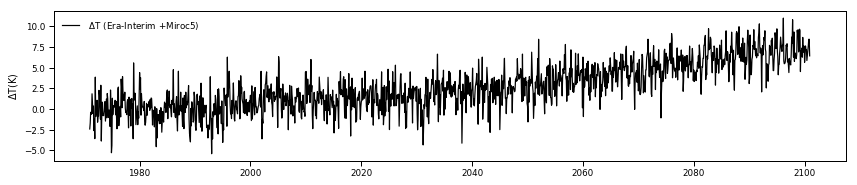

In [10]:
f,ax = plt.subplots(1,1, figsize = (12,8/3))
d_0 =  da.read_nc(toclu + '/exp_pism/pdd_runs/input_data/'+files[0])
# for i,fname in enumerate(files[1:]):

ax.plot(time_month,d_0['delta_T'].values,color= 'black',linestyle = '-',\
               label = ' $\mathrm{\Delta T}$ (Era-Interim +Miroc5)')
ax.set_ylabel('$\mathrm{\Delta T (K)}$')
# f.suptitle('July temperature changes with extremes every 20,10,5 years')
ax.legend(frameon = False)
f.tight_layout()
f.savefig(path_plot +'T_MIROC5.png', transparent=True)
# f.savefig(path_plot +'T_extremes.pdf')

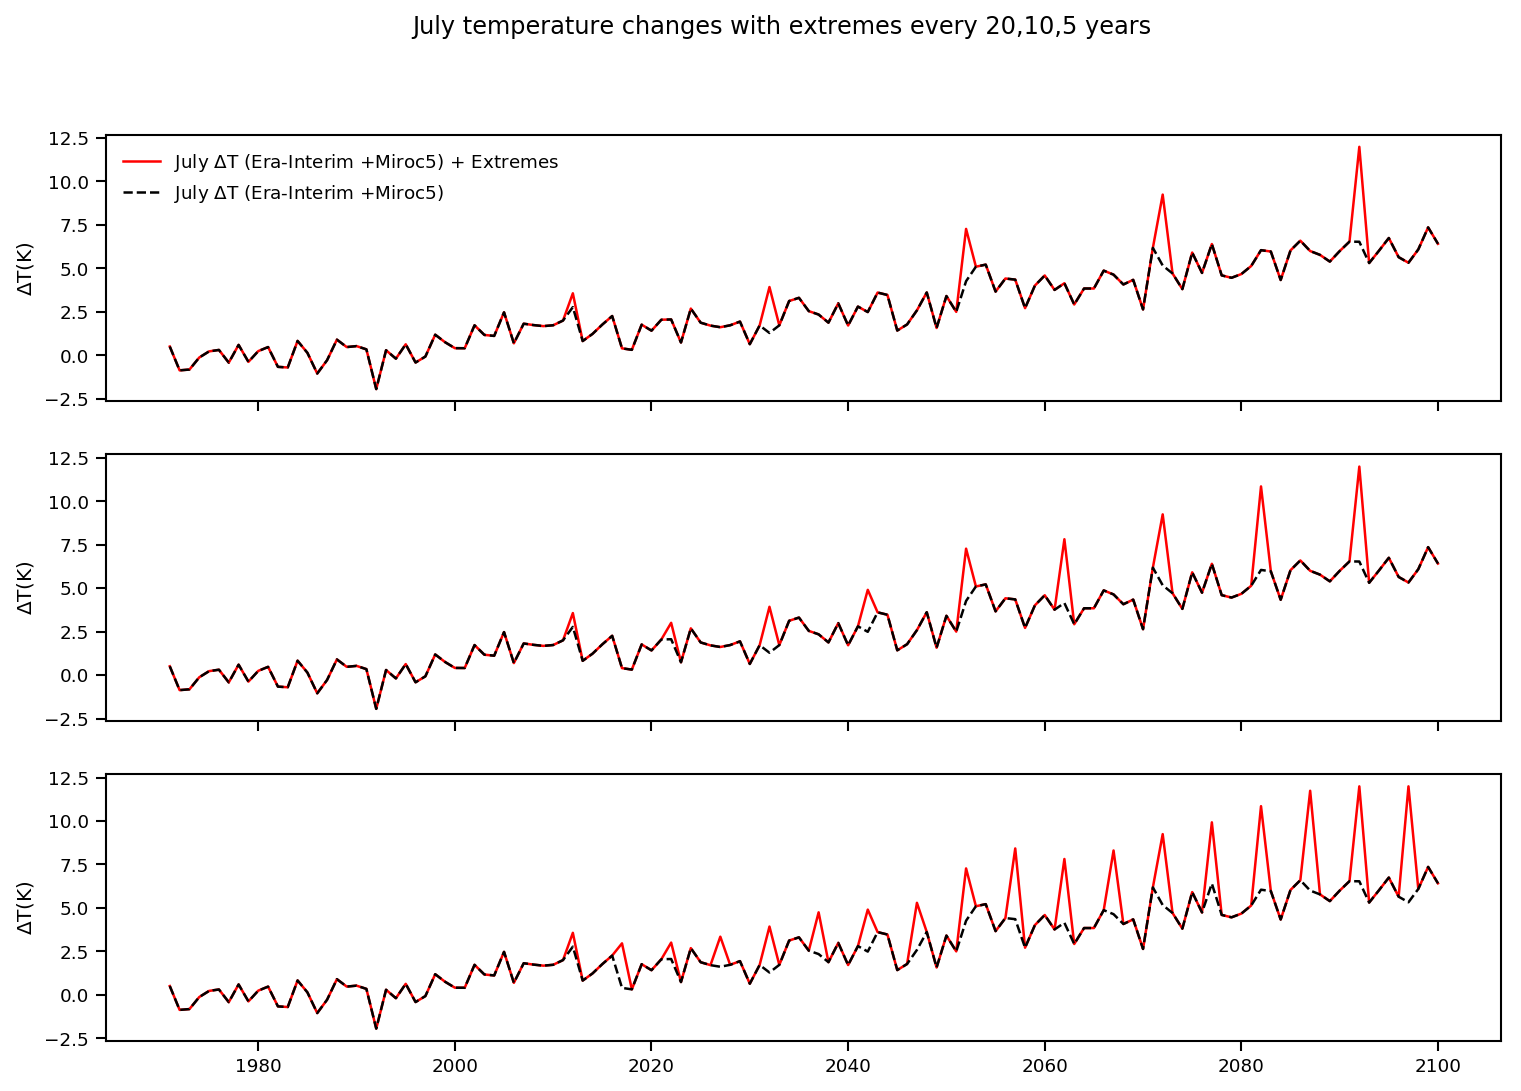

In [11]:
f,ax = plt.subplots(3,1, figsize = (12,8), sharex = True,dpi=150)
d_0 =  da.read_nc(toclu + '/exp_pism/pdd_runs/input_data/'+files[0])
for i,fname in enumerate(files[1:]):
    d = da.read_nc(toclu + '/exp_pism/pdd_runs/input_data/'+fname)
    
    ax[i].plot(years,d['delta_T'].values[6::12],color= 'red',\
              label = 'July $\mathrm{\Delta T}$ (Era-Interim +Miroc5) + Extremes')
    ax[i].plot(years,d_0['delta_T'].values[6::12],color= 'black',linestyle = '--',\
               label = 'July $\mathrm{\Delta T}$ (Era-Interim +Miroc5)')
    ax[i].set_ylabel('$\mathrm{\Delta T (K)}$')
f.suptitle('July temperature changes with extremes every 20,10,5 years')
ax[0].legend(frameon = False)

f.savefig(path_plot +'T_extremes.png', transparent=True)
f.savefig(path_plot +'T_extremes.pdf')

## resulst

In [7]:
time_month=np.arange('1971-01', '2101-01', dtype='datetime64[M]')
time = np.arange('1971', '2101', dtype='datetime64[Y]')

In [8]:
files_dyn0=[
    'proj_T_average_monthly_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_monthly_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_20_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_20_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_10_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_10_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_5_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_5_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/'

]

In [9]:
files_dyn = files_dyn0

In [10]:
files0 = [
    'proj_T_average_monthly_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_20_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_10_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_5_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
   
]

In [11]:
sia_e = 3.0
q =0.6
ssa_n = 3.0
GT_to_SLR=1/(1000*360)*1/12
output_proj = '/home/beckmann/mnt/cluhome/exp_pism/pdd_runs/projection_runs/4500m/'
spin_up =  '/home/beckmann/mnt/cluhome/exp_pism/pdd_runs/spin_up/4500m/paleo_1ka_0a_'+'sia_e_'+str(sia_e)+'_q_'+str(q)+'_ssa_n_'+str(ssa_n)+'/gris_4500m.nc'
bed_orig = '/home/beckmann/mnt/cluhome/exp_pism/my_first_runs/input_data/pism_Greenland_4500m_mcb_jpl_v_no_bath_plus_beddef.nc'
input_beds = '/home/beckmann/mnt/cluhome/icedata/pism_greenland_input/BedMachine/'
ftt_file =input_beds+'ftt_4500m.nc'
ctrl =  '/home/beckmann/mnt/cluhome/exp_pism/pdd_runs/spin_up/4500m/ctrl_nlr_sia_e_'+str(sia_e)+'_q_'+str(q)+'_ssa_n_'+str(ssa_n)+'/'

In [12]:
tfile = 'slr_pot_timeline.nc'
slp = 'sea_level_rise_potential'

sec_to_year = 60*60*24*365
A_ocean_m = 362.5*10**6*10**6
rho_ice = 910.0 
rho_fw =1000
rho_sw =1028.0
dx = 4500
dy = 4500
m3_to_slr= rho_ice/(rho_fw*A_ocean_m)

In [13]:
files = files_dyn
files[0]

'proj_T_average_monthly_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/'

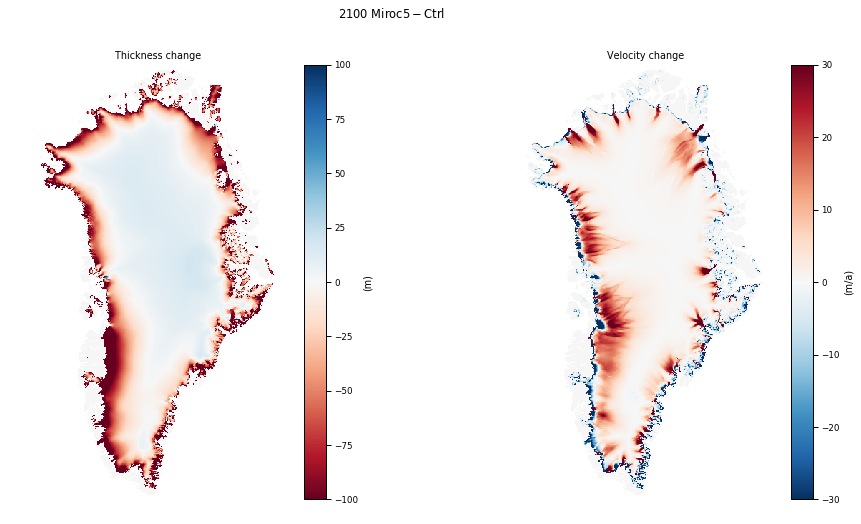

In [16]:
f = diff_2d_exp_ctrl(0,'2100 $\mathrm{Miroc5 - Ctrl}$',vthk=100,vvel=30)

f.savefig(path_plot +'prech_thk_vel_Miroc5.png', transparent=True,dpi=150)
f.savefig(path_plot +'prech_thk_vel_Miroc5.pdf')

In [17]:
files_dyn

['proj_T_average_monthly_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_monthly_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_20_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_20_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_10_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_10_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_5_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_5_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/']

In [18]:
cols =  ['blue','blue', 'green','green','orange','orange', 'red','red']

proj_T_average_monthly_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_monthly_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_20_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_20_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_10_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_10_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_5_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_5_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/


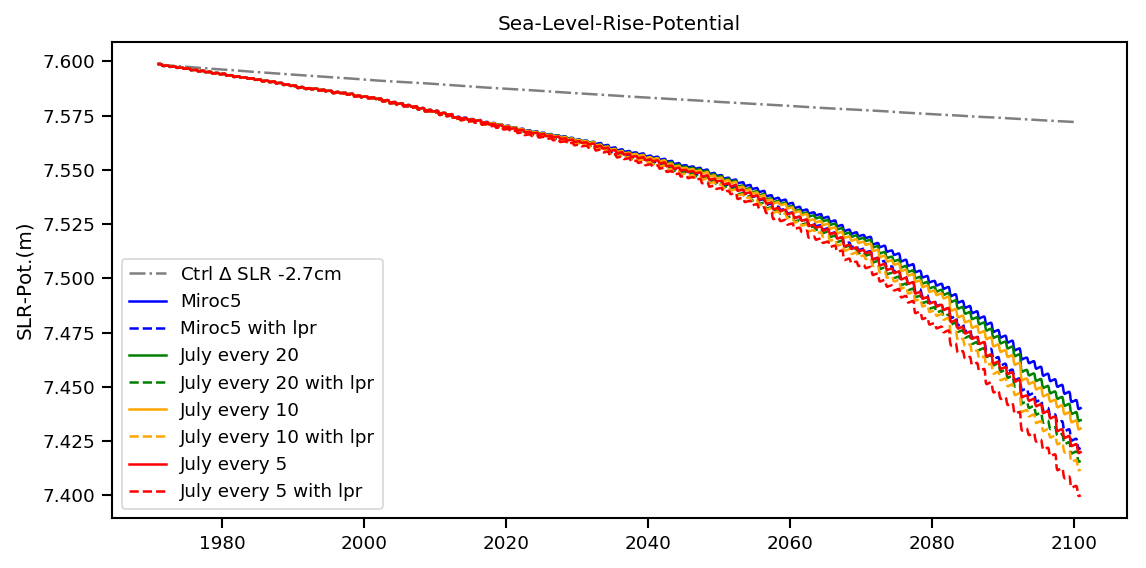

In [20]:
# d3 = da.read_nc(output_proj +files[0] +'ts_calc_slr_pot_no_neg_mass.nc',slp)
plt.subplots(1,1,figsize = (16*13.3/24.39,8*6.4/12.2),dpi=150)
d1 = da.read_nc(ctrl+'ts_gris_4500m.nc',slp)
plt.plot(time, d1.values[:130],color = 'black',linestyle = '-.',alpha = 0.5,\
         label = 'Ctrl $\Delta$ SLR '+str(np.round(100*d1.values[130]-100*d1.values[0],1))+ 'cm')
for i,fname in enumerate(files_dyn):
    print(fname)
    d_m = da.read_nc(output_proj + fname +'slr_pot_timeline.nc','slr_pot')
    if len(fname.split('lpr'))==2:
        if len(fname.split('July'))==2:
            plt.plot(time_month,d_m.values, color = cols[i],linestyle = 'dashed',label ='July every '+fname.split('July_')[-1].split('_')[0] +' with lpr')
        else:
            plt.plot(time_month,d_m.values,color = cols[i],linestyle = 'dashed', label ='Miroc5 with lpr')
            
    else:
        if len(fname.split('July'))==2:
            plt.plot(time_month,d_m.values,color = cols[i], label ='July every '+fname.split('July_')[-1].split('_')[0] )
        else:
            plt.plot(time_month,d_m.values,color = cols[i],label ='Miroc5')
            
        
# plt.plot(time_month,d3.values, label = 'calculated with delta SMB no neg mass'+ ' $\Delta$ SLR pot '+ \
#          str(np.round(d3.values[0]-d3.values[-1],2)))
# plt.title('Miroc5 Rcp 8.5 with constant precipitation')

plt.ylabel('SLR-Pot.(m)')
plt.title('Sea-Level-Rise-Potential')
plt.legend()
plt.savefig(path_plot + 'prech_Miroc_SLR.pdf', transparent=True)
plt.savefig(path_plot + 'prech_Miroc_SLR.png')

## static versus dynamic

In [21]:
dyn_effekt = np.zeros(len(files0))
dyn_effekt_rel = np.zeros(len(files0))
dyn_effekt_long = np.zeros((len(files0),len(time_month)))
my_list = [
'0'\
    ,'1/20'     
    ,'1/10'    
    ,'1/5'    
]
tt = np.linspace(1,4,4)
tt

array([1., 2., 3., 4.])

In [22]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='k', alpha = 0.5,linestyle ='-.'),
                Line2D([0], [0], color='k', linestyle = '--'),
                Line2D([0], [0], color='k' )]


In [23]:
files_dyn = files_dyn0[::2]
files_dyn

['proj_T_average_monthly_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_20_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_10_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_5_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/']

In [24]:
files=files0
files

['proj_T_average_monthly_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_20_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_10_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_5_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/']

proj_T_average_monthly_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_20_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_10_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_5_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_monthly_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_20_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_10_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_5_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/


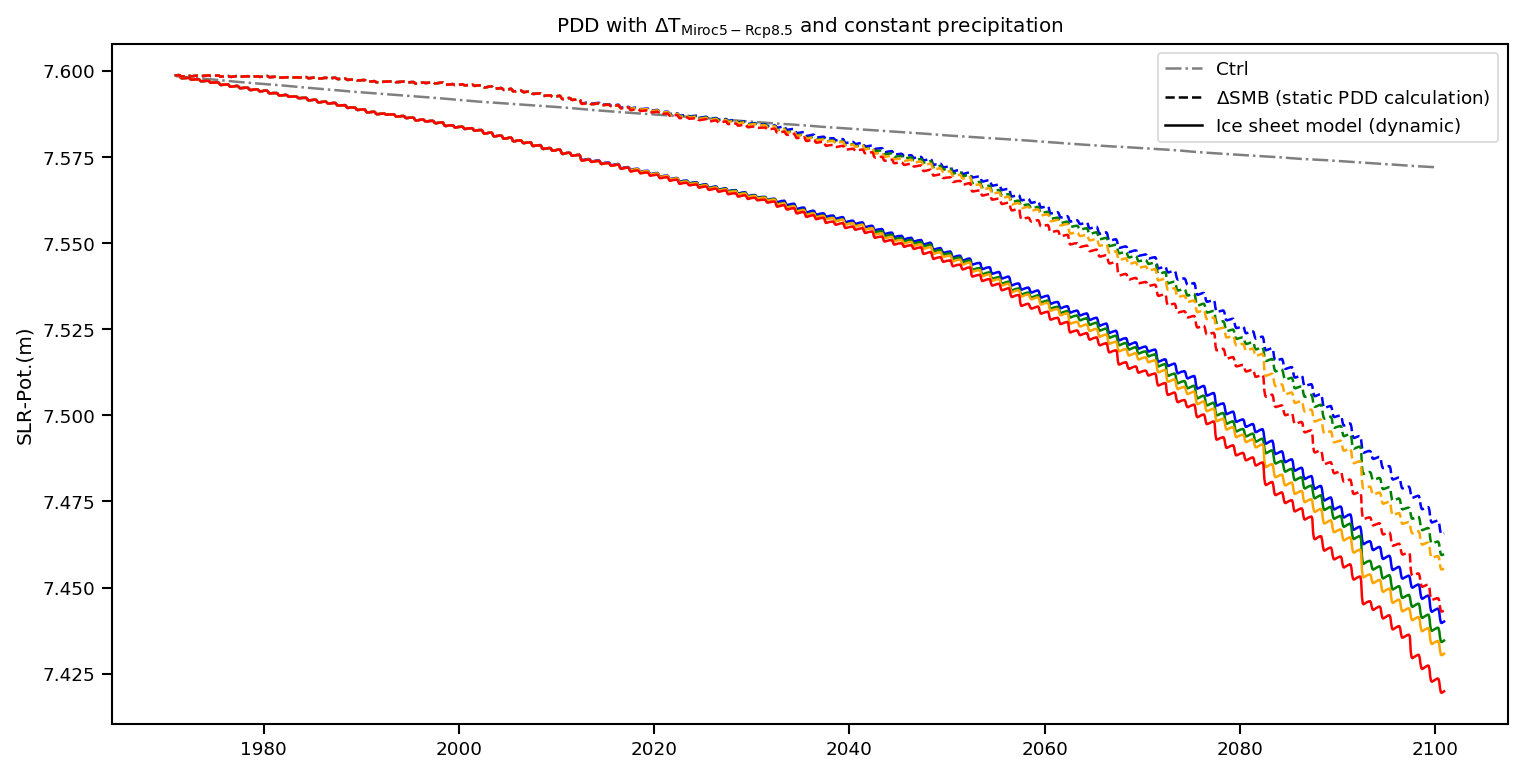

In [25]:
# d2 = da.read_nc(output_proj +files[0] +'ts_calc_slr_pot_neg_mass.nc',slp)
colors= [ 'blue', 'green','orange','red']

f, ax = plt.subplots(1,1, figsize = (12,6),dpi=150)
d1 = da.read_nc(ctrl+'ts_gris_4500m.nc',slp)
plt.plot(time, d1.values[:130],color = 'black',linestyle = '-.',alpha = 0.5,\
         label = 'Ctrl $\Delta$ SLR '+str(np.round(100*d1.values[130]-100*d1.values[0],1))+ 'cm')
for i,fname in enumerate(files_dyn):
    print(fname)
    d_m = da.read_nc(output_proj + fname +tfile,'slr_pot')
#     if d_m.time.size >1560:
#         ax.plot(time_month, d_m.values[:1560], label = fname.split('proj_')[-1]+ ' $\Delta$ SLR pot '+ \
#          str(np.round(d_m.values[0]-d_m.values[1560],2)), color = colors[i])
# #     elif(d_m.)
        
#     else:
    ax.plot(time_month, d_m.values, label = fname.split('proj_')[-1]+ ' $\Delta$ SLR pot '+ \
        str(np.round(d_m.values[0]-d_m.values[-1],2)), color = colors[i])
    dyn_effekt[i]=d_m.values[0]-d_m.values[-1]
    dyn_effekt_rel[i]=d_m.values[0]-d_m.values[-1]
    dyn_effekt_long[i,]=d_m.values
        
for i,fname in enumerate(files):
    print(fname)
    d_m = da.read_nc(output_proj + fname +'ts_calc_slr_pot_no_neg_mass.nc',slp)

    ax.plot(time_month, d_m.values, label = fname.split('proj_')[-1]+ ' $\Delta$ SLR pot '+ \
             str(np.round(d_m.values[0]-d_m.values[-1],2)), color = colors[i], linestyle = '--')
    dyn_effekt[i]=dyn_effekt[i]-(d_m.values[0]-d_m.values[-1])
    dyn_effekt_rel[i]=(dyn_effekt_rel[i]-(d_m.values[0]-d_m.values[-1]))/dyn_effekt_rel[i]
    
    dyn_effekt_long[i,]=dyn_effekt_long[i,]-d_m.values
    
       
# plt.plot(time_month,d2.values, label = 'calculated with delta SMB')
# plt.plot(time_month,d3.values, label = 'calculated with delta SMB no neg mass'+ ' $\Delta$ SLR pot '+ \
#          str(np.round(d3.values[0]-d3.values[-1],2)))
# ax.set_title('Miroc 5 rcp 8.5 with constant precipitation')
ax.set_title('PDD with $\mathrm{\Delta T_{Miroc5-Rcp8.5}}$ and constant precipitation')
# ax.legend(custom_lines, ['Ctrl', '$ \mathrm{\Delta SMB}$ (static Pdd calculation)', 'Ice sheet model ($ \mathrm{\Delta SMB}$  + dynamic changes)'])
ax.legend(custom_lines, ['Ctrl', '$ \mathrm{\Delta SMB}$ (static PDD calculation)', 'Ice sheet model (dynamic)'])

ax.set_ylabel('SLR-Pot.(m)')
# ax.legend()
plt.savefig(path_plot + 'prech_all_SLR.pdf')
plt.savefig(path_plot + 'prech_all_SLR.png', transparent=True)

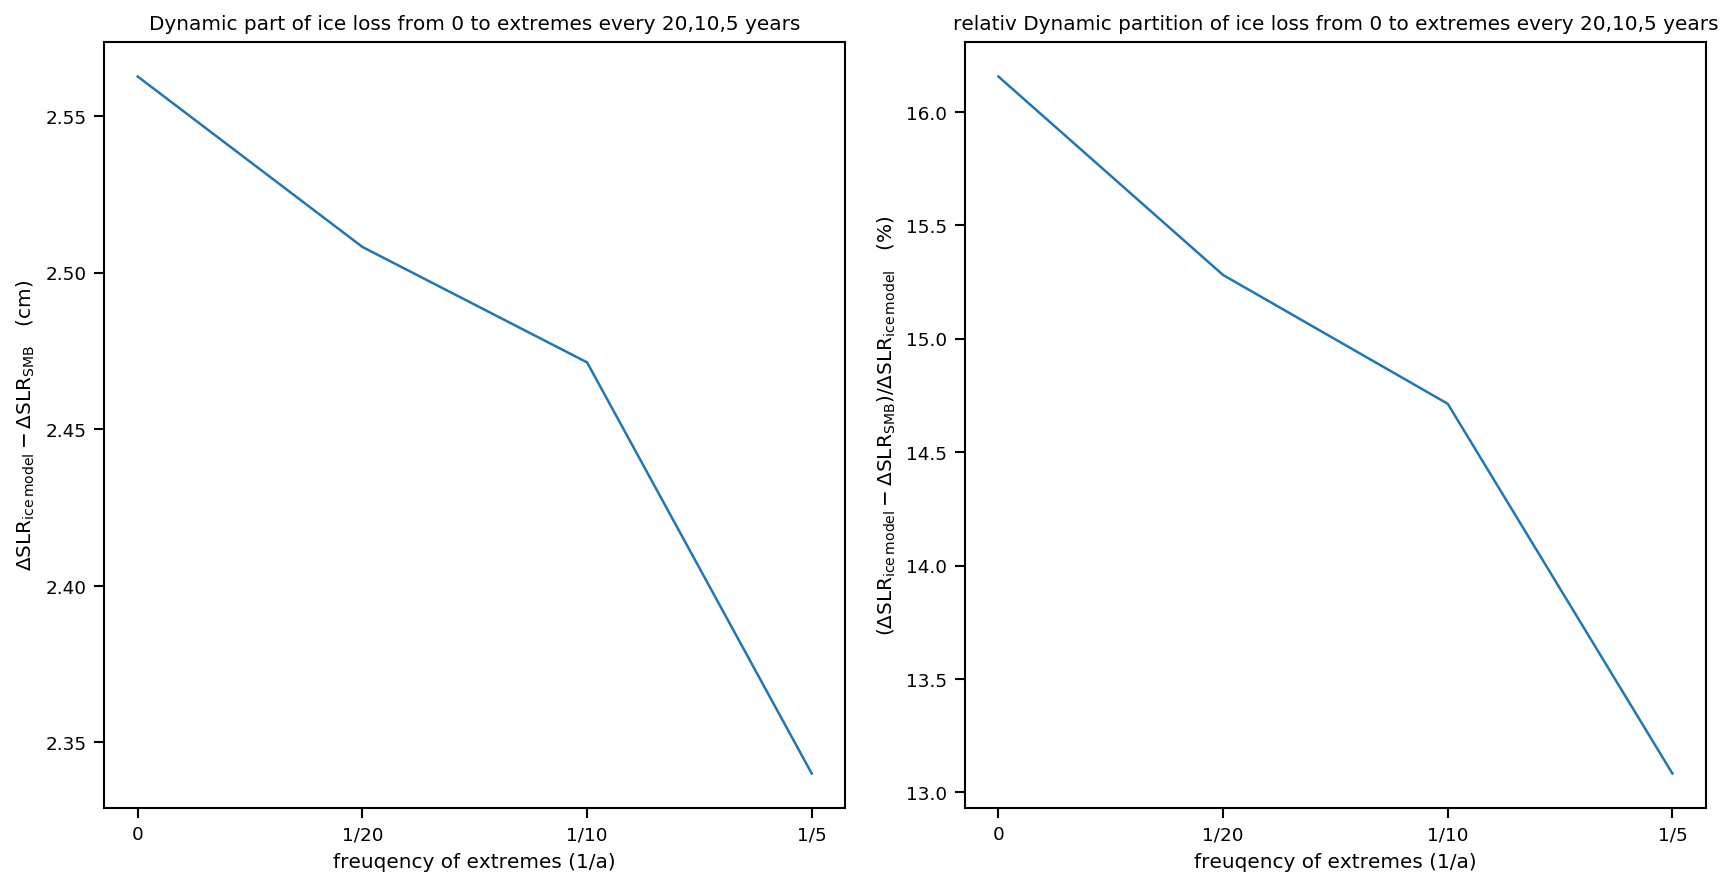

In [26]:
f,(ax,ax2) = plt.subplots(1,2,figsize= (12,6),dpi=150 ) 
ax.set_title( 'Dynamic part of ice loss from 0 to extremes every 20,10,5 years')
ax2.set_title( 'relativ Dynamic partition of ice loss from 0 to extremes every 20,10,5 years')
ax.plot(tt,dyn_effekt*100)
ax.set_xticks(tt)
# ax.xaxis.set_minor_formatter(plt.NullFormatter())
labels = ax.get_xticks().tolist()
labels = my_list
# labels[0::2]= ['','','','','']
# # labels[0] = files_name[0]
ax.set_xticklabels(labels,rotation = 0)
ax.set_ylabel('$\mathrm{\Delta SLR_{ice \, model} - \Delta SLR_{SMB}\quad (cm) } $' )
ax.set_xlabel('freuqency of extremes (1/a)')
# labels = [item.get_text() for item in ax.get_xticklabels()]
ax2.plot(tt,dyn_effekt_rel*100)
ax2.set_xticks(tt)
# ax.xaxis.set_minor_formatter(plt.NullFormatter())
labels = ax2.get_xticks().tolist()
labels = my_list
# labels[0::2]= ['','','','','']
# # labels[0] = files_name[0]
ax2.set_xticklabels(labels,rotation = 0)
ax2.set_ylabel('$\mathrm{(\Delta SLR_{ice \, model} - \Delta SLR_{SMB})/\Delta SLR_{ice \, model} \quad (\%) } $' )
ax2.set_xlabel('freuqency of extremes (1/a)')

f.tight_layout()
plt.savefig(path_plot + 'prech_dyn_attr.pdf')
plt.savefig(path_plot + 'prech_dyn_attr.png', transparent=True)

In [27]:
dyn_effekt_rel_nlpr=dyn_effekt_rel.copy()
dyn_effekt_nlpr=dyn_effekt.copy()
dyn_effekt_long_nlr=dyn_effekt_long.copy()

In [28]:
files_dyn = files_dyn0[1::2]
files_dyn

['proj_T_average_monthly_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_20_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_10_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_5_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/']

proj_T_average_monthly_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_20_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_10_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_5_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_monthly_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_20_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_10_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/
proj_T_average_July_5_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/


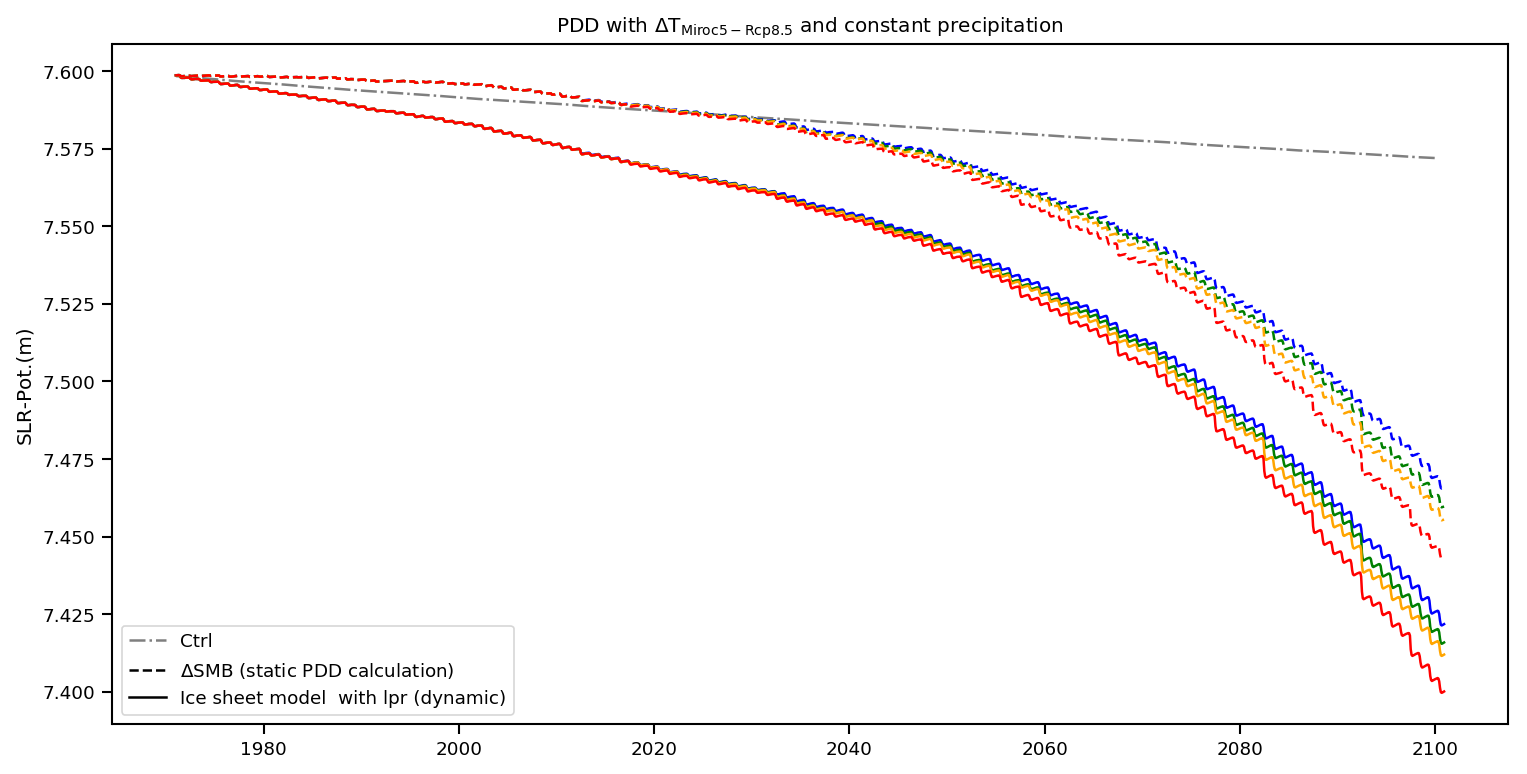

In [29]:
# d2 = da.read_nc(output_proj +files[0] +'ts_calc_slr_pot_neg_mass.nc',slp)
colors= [ 'blue', 'green','orange','red']

f, ax = plt.subplots(1,1, figsize = (12,6),dpi=150)
d1 = da.read_nc(ctrl+'ts_gris_4500m.nc',slp)
plt.plot(time, d1.values[:130],color = 'black',linestyle = '-.',alpha = 0.5,\
         label = 'Ctrl $\Delta$ SLR '+str(np.round(100*d1.values[130]-100*d1.values[0],1))+ 'cm')
for i,fname in enumerate(files_dyn):
    print(fname)
    d_m = da.read_nc(output_proj + fname +tfile,'slr_pot')
#     if d_m.time.size >1560:
#         ax.plot(time_month, d_m.values[:1560], label = fname.split('proj_')[-1]+ ' $\Delta$ SLR pot '+ \
#          str(np.round(d_m.values[0]-d_m.values[1560],2)), color = colors[i])
# #     elif(d_m.)
        
#     else:
    ax.plot(time_month, d_m.values, label = fname.split('proj_')[-1]+ ' $\Delta$ SLR pot '+ \
        str(np.round(d_m.values[0]-d_m.values[-1],2)), color = colors[i])
    dyn_effekt[i]=d_m.values[0]-d_m.values[-1]
    dyn_effekt_rel[i]=d_m.values[0]-d_m.values[-1]
    dyn_effekt_long[i,]=d_m.values
        
for i,fname in enumerate(files):
    print(fname)
    d_m = da.read_nc(output_proj + fname +'ts_calc_slr_pot_no_neg_mass.nc',slp)

    ax.plot(time_month, d_m.values, label = fname.split('proj_')[-1]+ ' $\Delta$ SLR pot '+ \
             str(np.round(d_m.values[0]-d_m.values[-1],2)), color = colors[i], linestyle = '--')
    dyn_effekt[i]=dyn_effekt[i]-(d_m.values[0]-d_m.values[-1])
    dyn_effekt_rel[i]=(dyn_effekt_rel[i]-(d_m.values[0]-d_m.values[-1]))/dyn_effekt_rel[i]
    
    dyn_effekt_long[i,]=dyn_effekt_long[i,]-d_m.values
    
       
# plt.plot(time_month,d2.values, label = 'calculated with delta SMB')
# plt.plot(time_month,d3.values, label = 'calculated with delta SMB no neg mass'+ ' $\Delta$ SLR pot '+ \
#          str(np.round(d3.values[0]-d3.values[-1],2)))
# ax.set_title('Miroc 5 rcp 8.5 with constant precipitation')
ax.set_title('PDD with $\mathrm{\Delta T_{Miroc5-Rcp8.5}}$ and constant precipitation')
# ax.legend(custom_lines, ['Ctrl', '$ \mathrm{\Delta SMB}$ (static Pdd calculation)', 'Ice sheet model ($ \mathrm{\Delta SMB}$  + dynamic changes)'])
ax.legend(custom_lines, ['Ctrl', '$ \mathrm{\Delta SMB}$ (static PDD calculation)', 'Ice sheet model  with lpr (dynamic)'])

ax.set_ylabel('SLR-Pot.(m)')
# ax.legend()
plt.savefig(path_plot + 'prech_all_SLR.pdf')
plt.savefig(path_plot + 'prech_all_SLR.png', transparent=True)

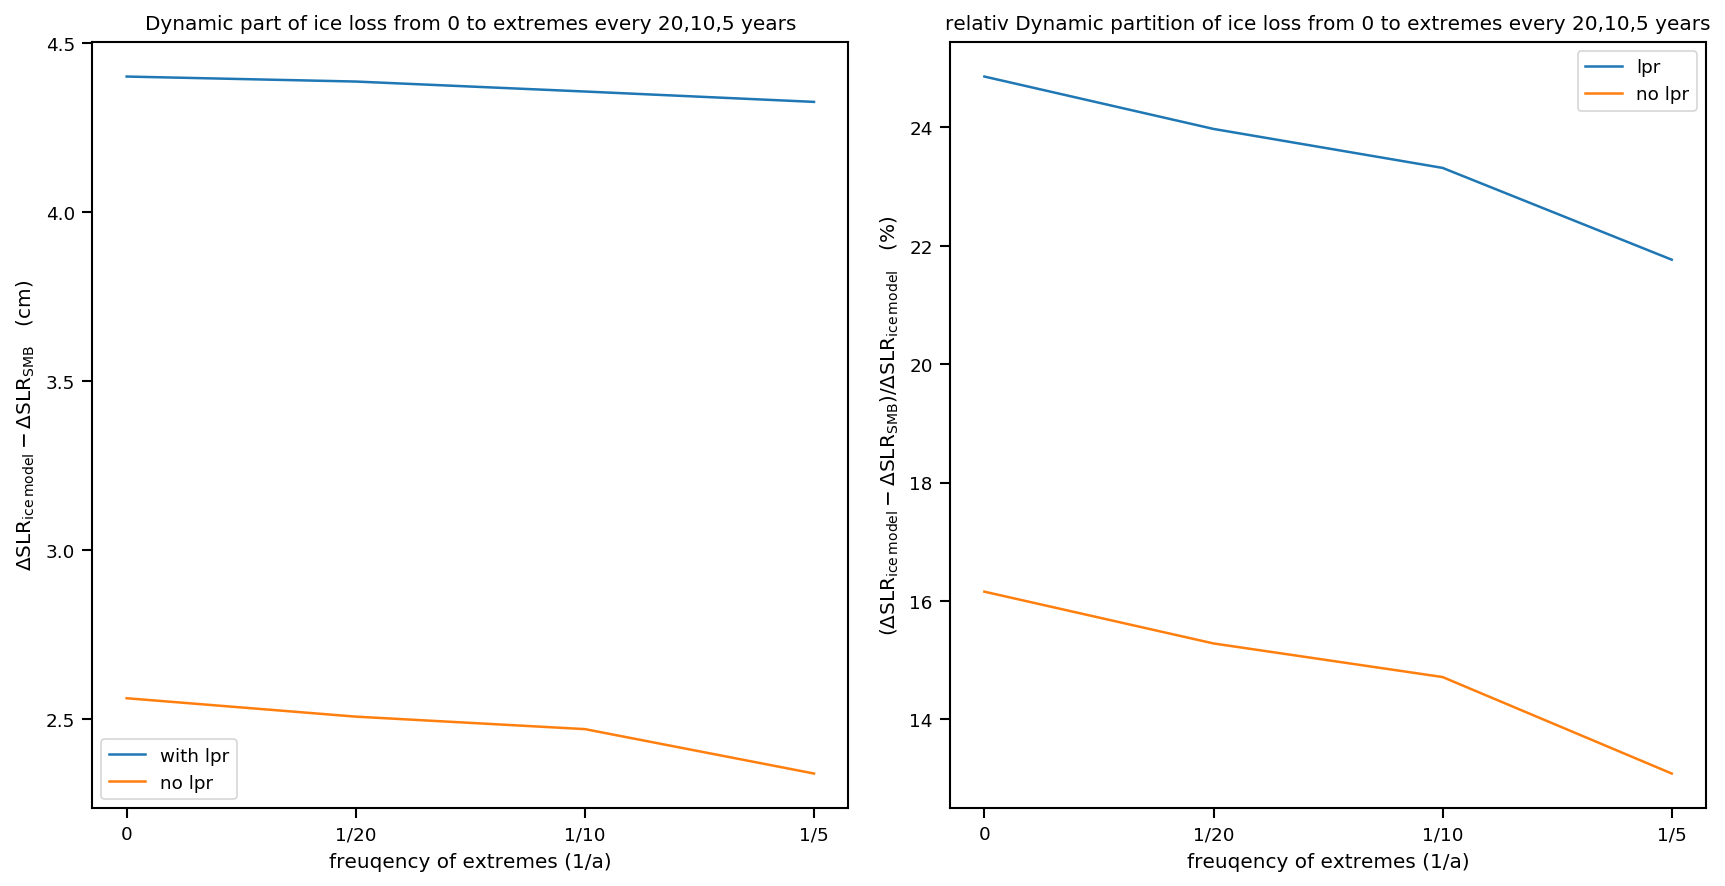

In [30]:
f,(ax,ax2) = plt.subplots(1,2,figsize= (12,6),dpi=150 ) 
ax.set_title( 'Dynamic part of ice loss from 0 to extremes every 20,10,5 years')
ax2.set_title( 'relativ Dynamic partition of ice loss from 0 to extremes every 20,10,5 years')
ax.plot(tt,dyn_effekt*100, label = 'with lpr')
ax.plot(tt,dyn_effekt_nlpr*100,label = 'no lpr')
ax.set_xticks(tt)
# ax.xaxis.set_minor_formatter(plt.NullFormatter())
labels = ax.get_xticks().tolist()
labels = my_list
# labels[0::2]= ['','','','','']
# # labels[0] = files_name[0]
ax.set_xticklabels(labels,rotation = 0)
ax.set_ylabel('$\mathrm{\Delta SLR_{ice \, model} - \Delta SLR_{SMB}\quad (cm) } $' )
ax.set_xlabel('freuqency of extremes (1/a)')
# labels = [item.get_text() for item in ax.get_xticklabels()]

ax2.plot(tt,dyn_effekt_rel*100,label = 'lpr')
ax2.plot(tt,dyn_effekt_rel_nlpr*100,label ='no lpr')
ax2.set_xticks(tt)
# ax.xaxis.set_minor_formatter(plt.NullFormatter())
labels = ax2.get_xticks().tolist()
labels = my_list
# labels[0::2]= ['','','','','']
# # labels[0] = files_name[0]
ax2.set_xticklabels(labels,rotation = 0)
ax2.set_ylabel('$\mathrm{(\Delta SLR_{ice \, model} - \Delta SLR_{SMB})/\Delta SLR_{ice \, model} \quad (\%) } $' )
ax2.set_xlabel('freuqency of extremes (1/a)')

f.tight_layout()
plt.savefig(path_plot + 'prech_dyn_attr_lpr.pdf')
plt.savefig(path_plot + 'prech_dyn_attr_lpr.png', transparent=True)
ax.legend()
ax2.legend()

In [44]:
np.savez('./datasets/dyn_attr_withprecip.npz',\
        dyn_effekt=dyn_effekt,dyn_effekt_nlpr=dyn_effekt_nlpr,\
         dyn_effekt_rel=dyn_effekt_rel,dyn_effekt_rel_nlpr=dyn_effekt_rel_nlpr,\
        dyn_effekt_long=dyn_effekt_long,dyn_effekt_long_nlr=dyn_effekt_long_nlr)

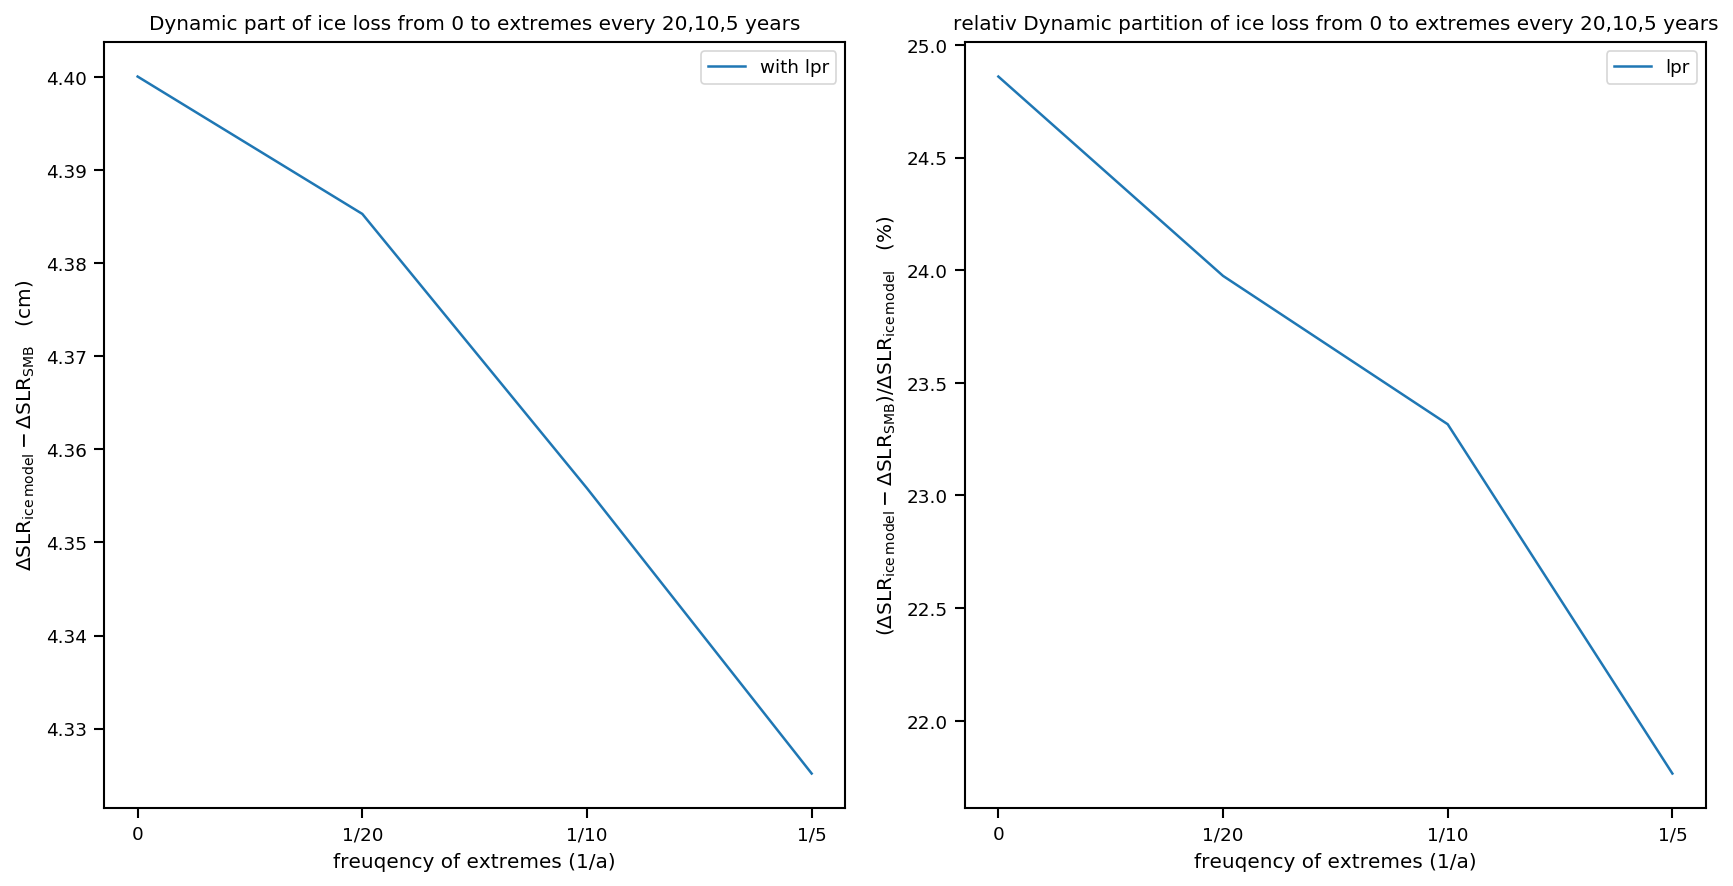

In [32]:
f,(ax,ax2) = plt.subplots(1,2,figsize= (12,6),dpi=150 ) 
ax.set_title( 'Dynamic part of ice loss from 0 to extremes every 20,10,5 years')
ax2.set_title( 'relativ Dynamic partition of ice loss from 0 to extremes every 20,10,5 years')
ax.plot(tt,dyn_effekt*100, label = 'with lpr')
# ax.plot(tt,dyn_effekt_nlpr*100,label = 'no lpr')
ax.set_xticks(tt)
# ax.xaxis.set_minor_formatter(plt.NullFormatter())
labels = ax.get_xticks().tolist()
labels = my_list
# labels[0::2]= ['','','','','']
# # labels[0] = files_name[0]
ax.set_xticklabels(labels,rotation = 0)
ax.set_ylabel('$\mathrm{\Delta SLR_{ice \, model} - \Delta SLR_{SMB}\quad (cm) } $' )
ax.set_xlabel('freuqency of extremes (1/a)')
# labels = [item.get_text() for item in ax.get_xticklabels()]

ax2.plot(tt,dyn_effekt_rel*100,label = 'lpr')
# ax2.plot(tt,dyn_effekt_rel_nlpr*100,label ='no lpr')
ax2.set_xticks(tt)
# ax.xaxis.set_minor_formatter(plt.NullFormatter())
labels = ax2.get_xticks().tolist()
labels = my_list
# labels[0::2]= ['','','','','']
# # labels[0] = files_name[0]
ax2.set_xticklabels(labels,rotation = 0)
ax2.set_ylabel('$\mathrm{(\Delta SLR_{ice \, model} - \Delta SLR_{SMB})/\Delta SLR_{ice \, model} \quad (\%) } $' )
ax2.set_xlabel('freuqency of extremes (1/a)')

f.tight_layout()
plt.savefig(path_plot + 'prech_dyn_attr_lpr.pdf')
plt.savefig(path_plot + 'prech_dyn_attr_lpr.png', transparent=True)
ax.legend()
ax2.legend()

In [46]:
files_dyn

['proj_T_average_monthly_lpr_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_20_twice10ym_lpr_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_10_twice10ym_lpr_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_5_twice10ym_lpr_dev_5.0_const_ref_0.25_temp_dT_par_275.15/']

In [49]:
colors

['blue', 'green', 'orange', 'red']

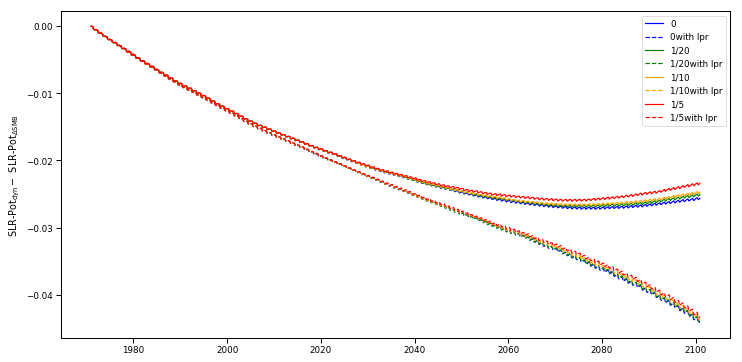

In [33]:
f=plt.subplots(1,1, figsize = (12,6))
for i,t in enumerate(files_dyn):
    plt.plot(time_month,dyn_effekt_long_nlr[i,],label =my_list[i], color =colors[i])
    plt.plot(time_month,dyn_effekt_long[i,],label =my_list[i] + 'with lpr', color =colors[i],linestyle = '--')
plt.ylabel('SLR-$\mathrm{Pot_{dyn}-}$ SLR-$\mathrm{Pot_{\Delta SMB}}$')
plt.legend()

# 2D diffs

In [34]:
files_dyn0

['proj_T_average_monthly_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_monthly_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_20_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_20_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_10_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_10_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_5_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_5_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/']

In [35]:
files

['proj_T_average_monthly_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_20_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_10_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_5_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/']

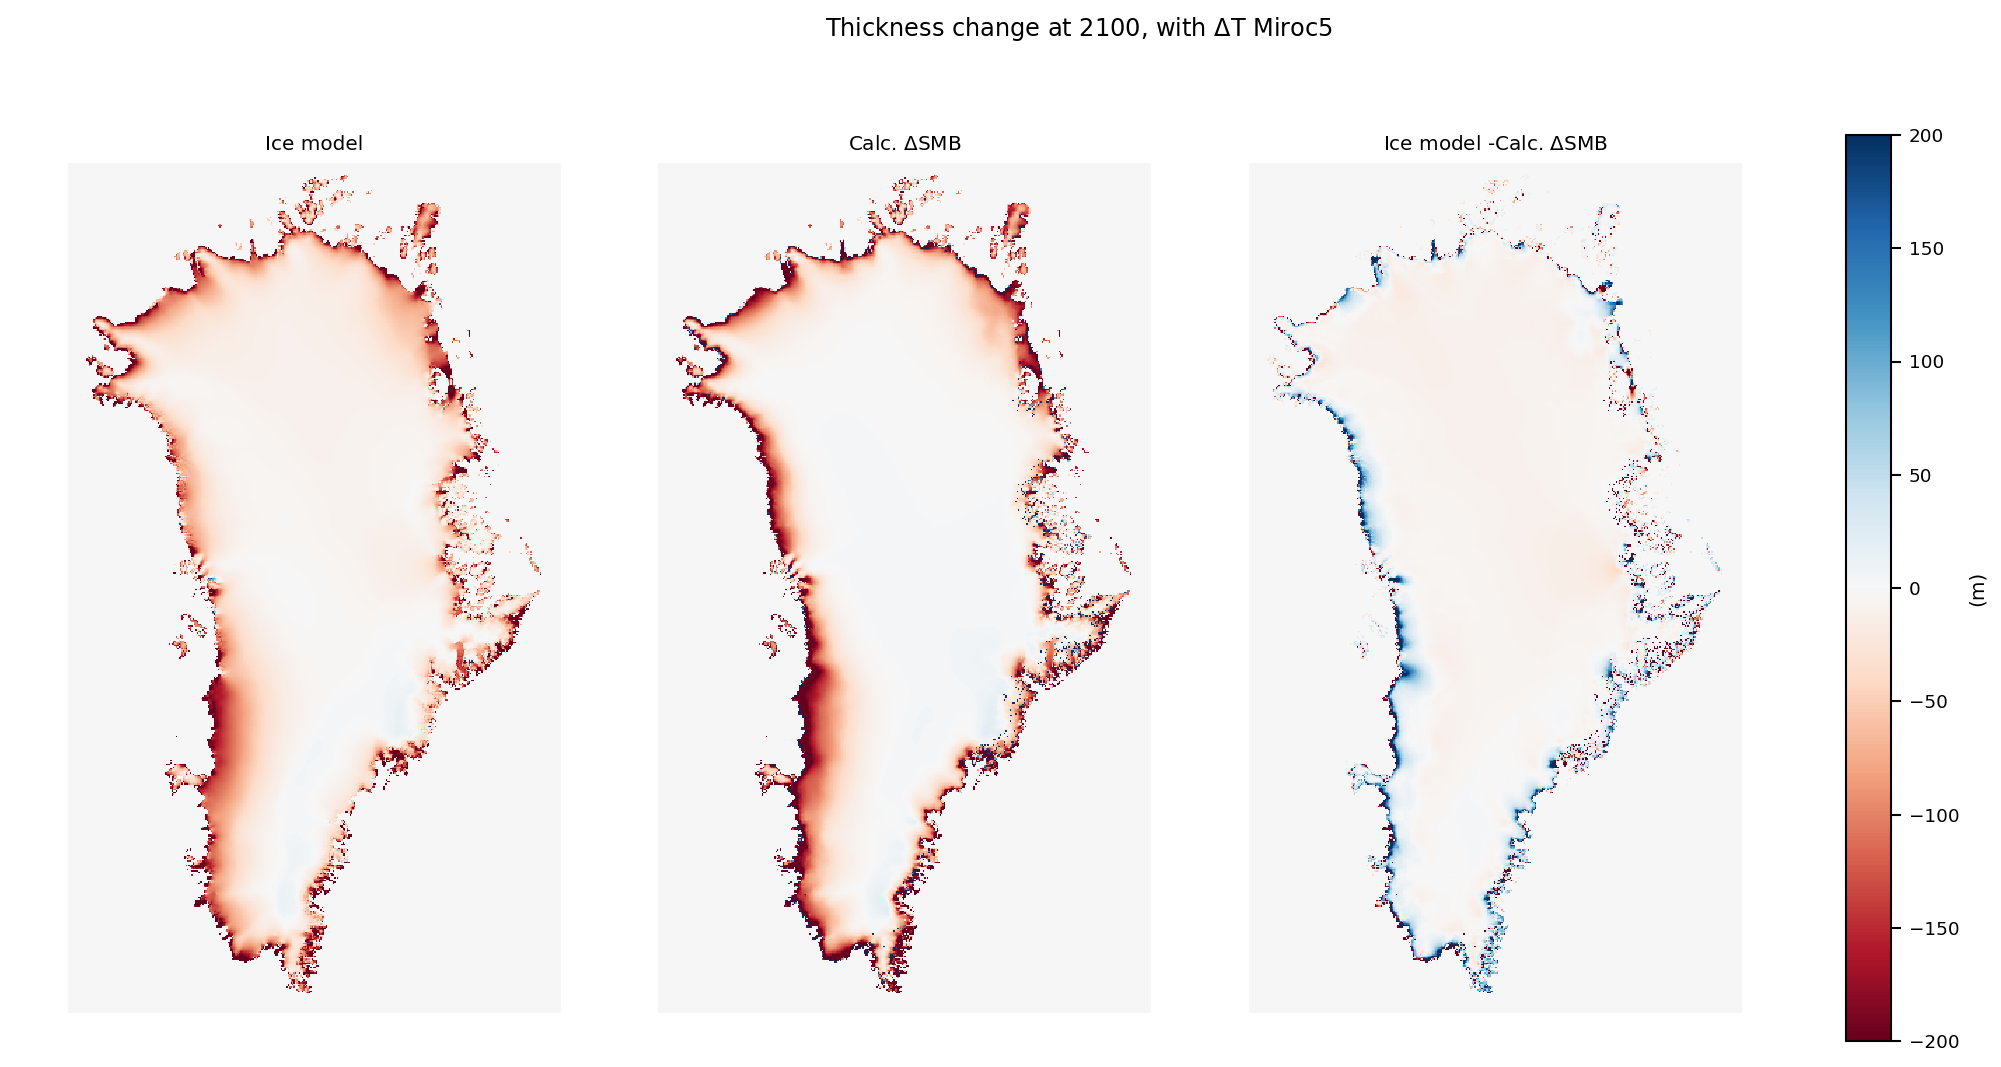

In [36]:
### NO extremes

file = files_dyn0[0]
file_no_mass= files[0]
thk0 = da.read_nc(output_proj + 'proj_step6K_330a_no_mass/'+'gris_4500.nc','thk')
thk1 = da.read_nc(output_proj+file+'y130gris_4500.nc','thk')
nn = np.load(output_proj + file_no_mass + 'calc_thickness_grounded_from_total_thickness.npz')
dthk1=nn['thk_last']
dthk0= nn['thk_0']

dthk1_normal = dthk1
thk1_normal = thk1


vvel = 200
f,ax =plt.subplots(1,3,figsize =(18,8),dpi=150)
f.suptitle('Thickness change at 2100, with $ \mathrm{\Delta T} $ Miroc5 ')

ax[0].set_title('Ice model')
ax[1].set_title('Calc. $\mathrm{\Delta SMB }$')
ax[2].set_title('Ice model -Calc. $\mathrm{\Delta SMB }$')
css=ax[0].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
# plt.axis('off')
ax[0].set_axis_off()
cs1=ax[1].imshow( dthk1-dthk0 ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
# plt.axis('off')
ax[1].set_axis_off()

cs2=ax[2].imshow( thk1.values[0,]-dthk1 ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
ax[2].set_axis_off()
# f.colorbar(css, ax = ax[0])
# f.colorbar(cs1, ax = ax[1])
f.colorbar(cs2,ax=ax.ravel().tolist(), label ='(m)')
plt.savefig(path_plot + 'prech_2d_Mirco5_dyn_stat.pdf')
plt.savefig(path_plot + 'prech_2d_Mirco5_dyn_stat.png', transparent=True)
# plt.axis('off')

In [37]:
files_dyn0

['proj_T_average_monthly_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_monthly_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_20_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_20_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_10_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_10_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_5_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_5_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/']

In [38]:
files

['proj_T_average_monthly_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_20_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_10_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_5_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/']

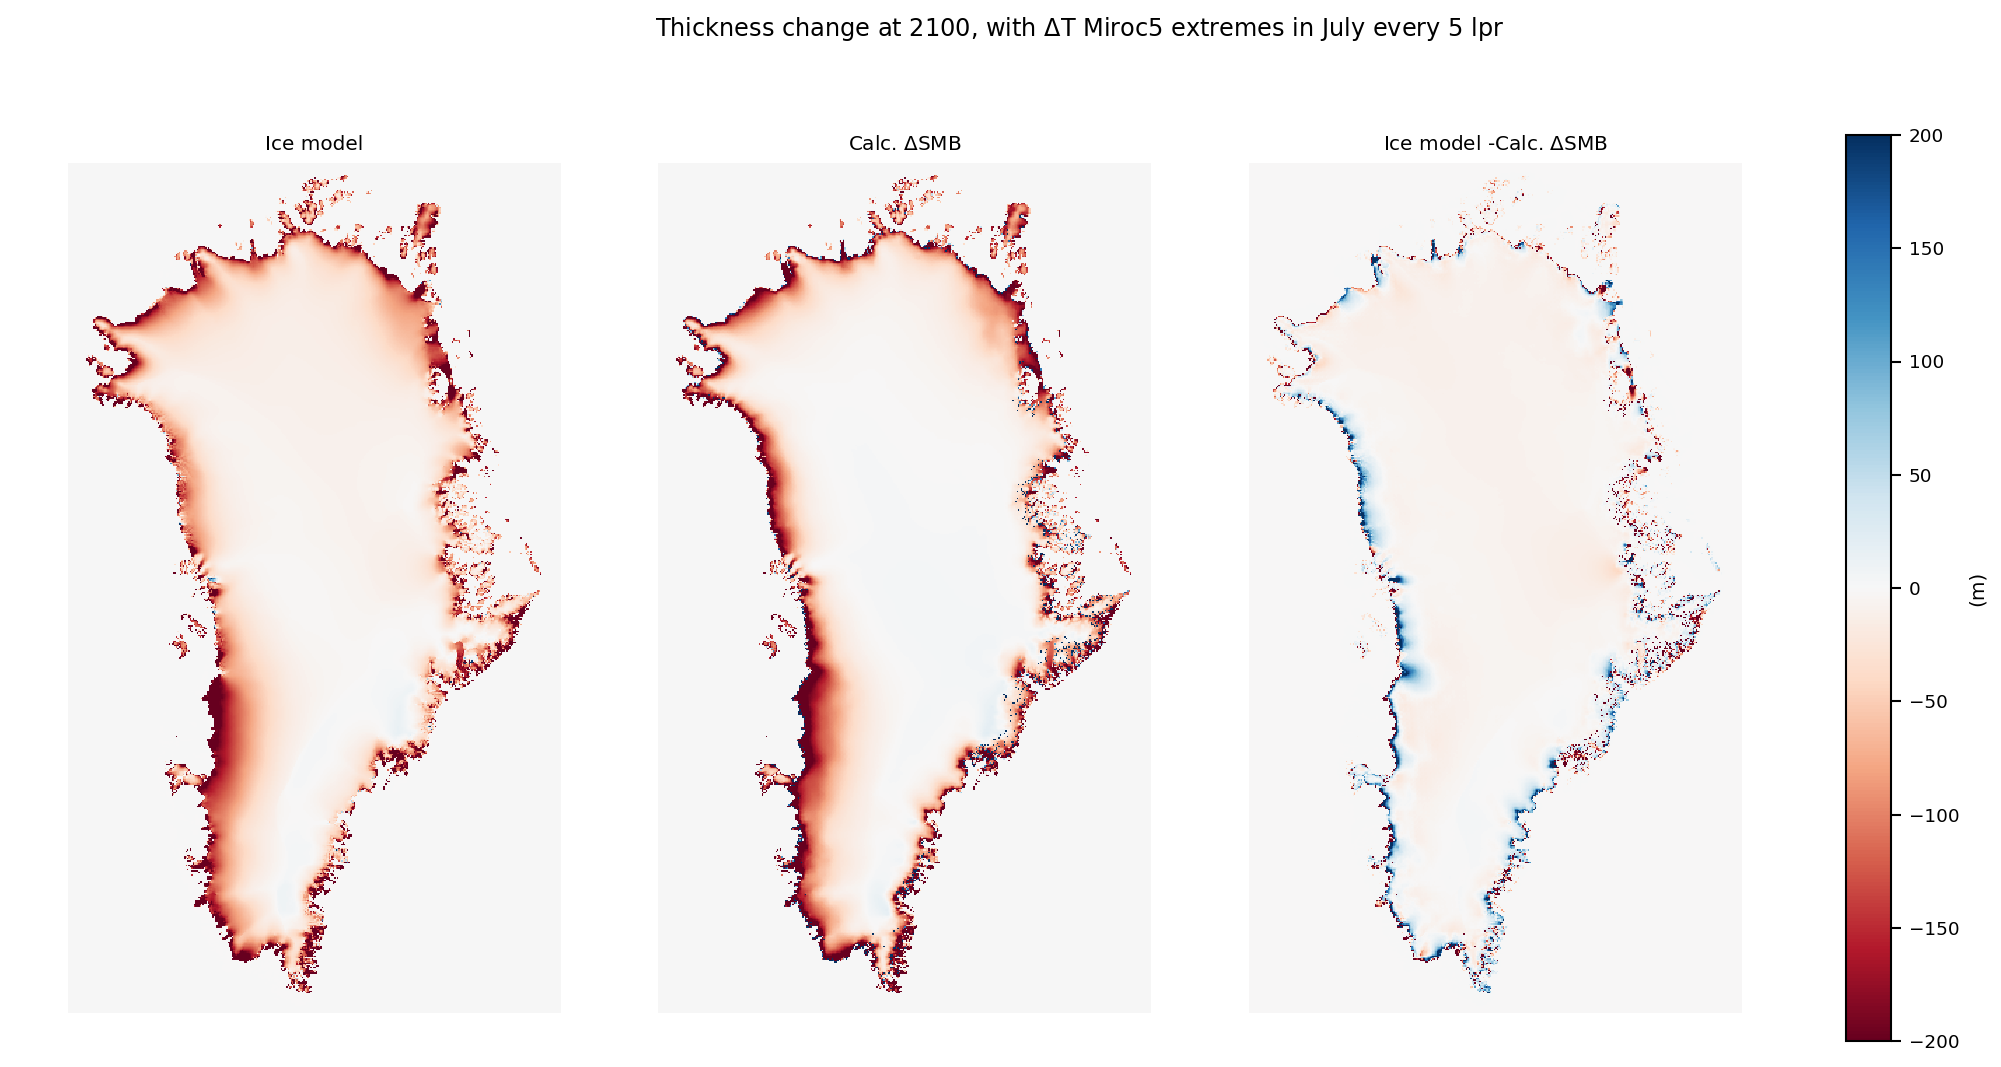

In [39]:
### extremes

file = files_dyn0[7]
file_no_mass= files[3]
thk0 = da.read_nc(output_proj + 'proj_step6K_330a_no_mass/'+'gris_4500.nc','thk')
thk1 = da.read_nc(output_proj+file+'y130gris_4500.nc','thk')
nn = np.load(output_proj + file_no_mass + 'calc_thickness_grounded_from_total_thickness.npz')
dthk1=nn['thk_last']
dthk0= nn['thk_0']
dthk1_extr = dthk1
thk1_extr = thk1



vvel = 200
f,ax =plt.subplots(1,3,figsize =(18,8),dpi=150)
f.suptitle('Thickness change at 2100, with $ \mathrm{\Delta T} $ Miroc5 extremes in July every 5 lpr')

ax[0].set_title('Ice model')
ax[1].set_title('Calc. $\mathrm{\Delta SMB }$')
ax[2].set_title('Ice model -Calc. $\mathrm{\Delta SMB }$')
css=ax[0].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
# plt.axis('off')
ax[0].set_axis_off()
cs1=ax[1].imshow( dthk1-dthk0 ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
# plt.axis('off')
ax[1].set_axis_off()

cs2=ax[2].imshow( thk1.values[0,]-dthk1 ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
ax[2].set_axis_off()
# f.colorbar(css, ax = ax[0])
# f.colorbar(cs1, ax = ax[1])
f.colorbar(cs2,ax=ax.ravel().tolist(), label ='(m)')
plt.savefig(path_plot + 'prech_2d_Mirco5_dyn_e5_stat.pdf')
plt.savefig(path_plot + 'prech_2d_Mirco5_dyn_e5_stat.png', transparent=True)
# plt.axis('off')

In [40]:
file

'proj_T_average_July_5_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/'

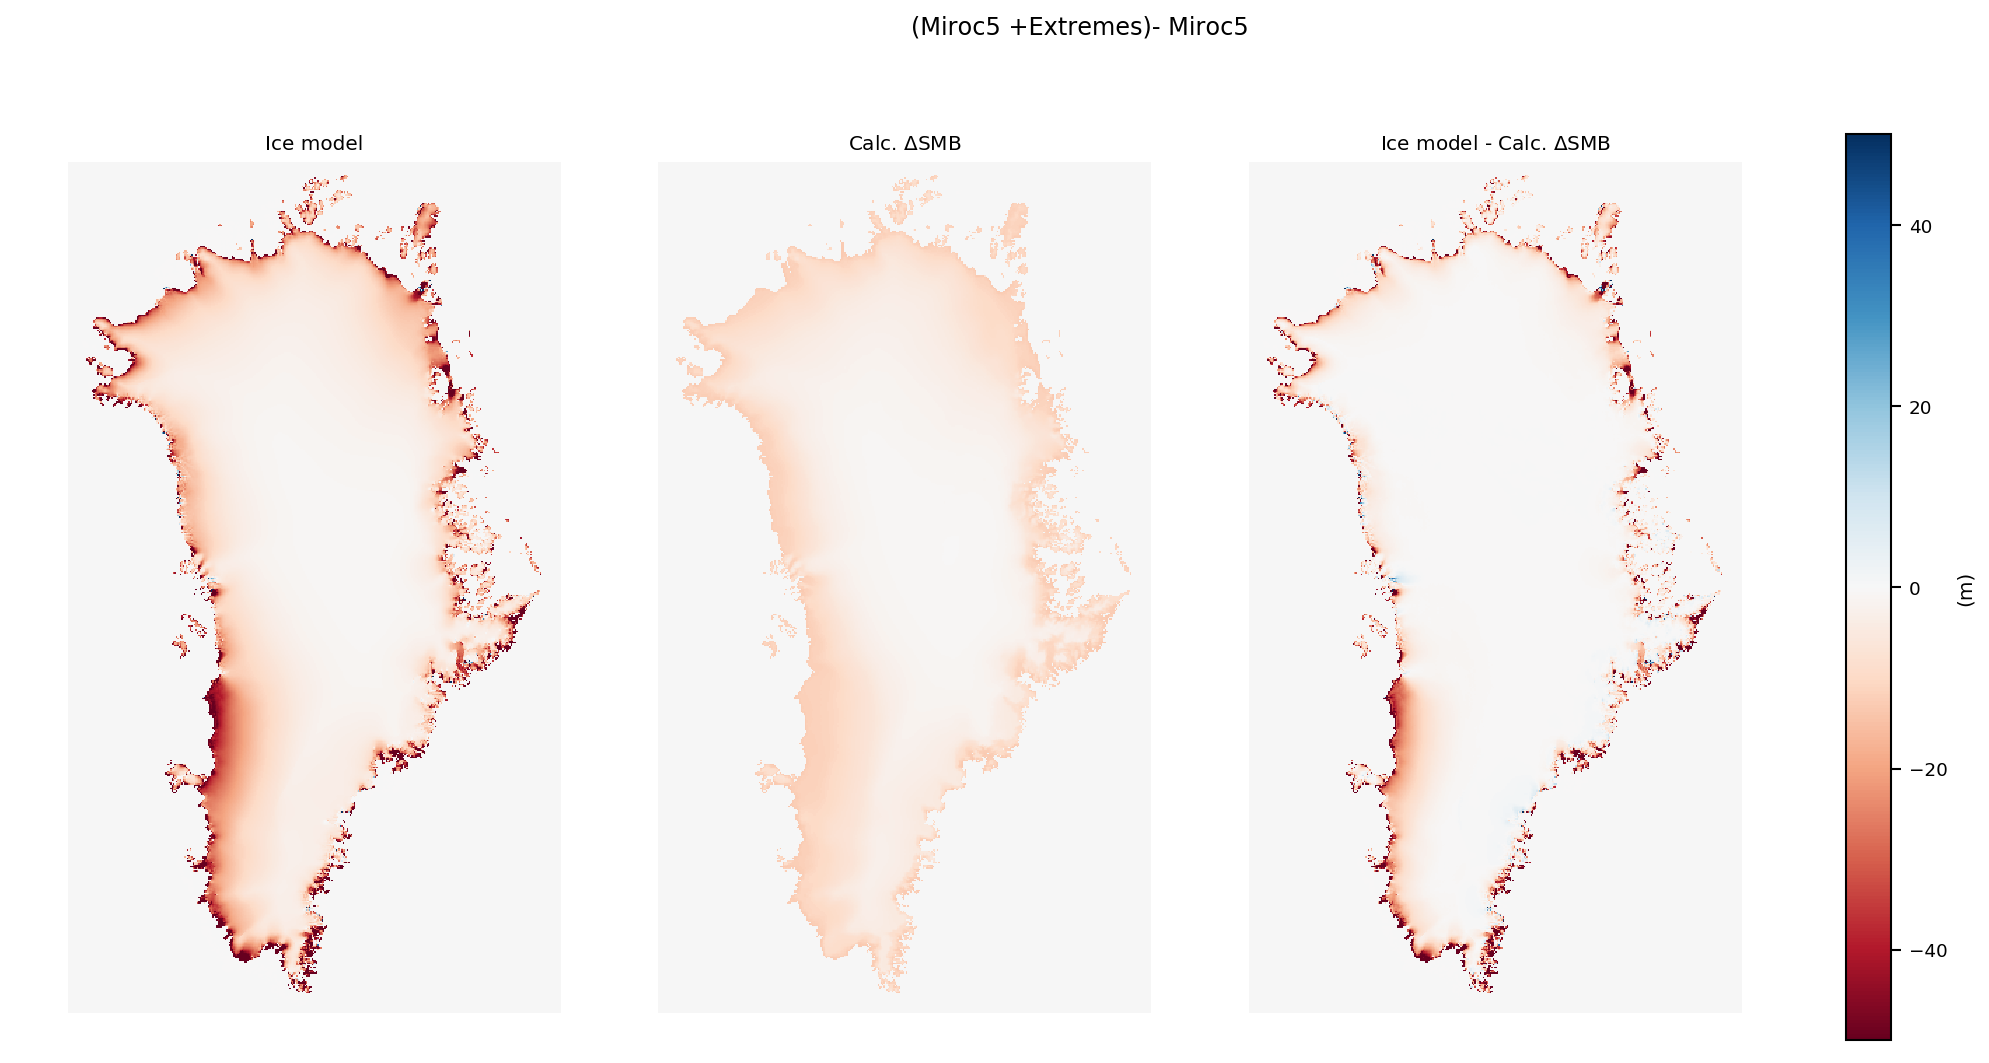

In [42]:

vvel = 50
f,ax =plt.subplots(1,3,figsize =(18,8),dpi=150)
f.suptitle('(Miroc5 +Extremes)- Miroc5')

ax[0].set_title('Ice model')
ax[1].set_title('Calc. $\mathrm{\Delta SMB }$')
ax[2].set_title('Ice model - Calc. $\mathrm{\Delta SMB }$')
css=ax[0].imshow( thk1_extr.values[0,]-thk1_normal.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
cs1=ax[1].imshow( dthk1_extr-dthk1_normal ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
cs2=ax[2].imshow( thk1_extr.values[0,]-dthk1_extr -(thk1_normal.values[0]-dthk1_normal) ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
f.colorbar(cs2,ax=ax.ravel().tolist(), label ='(m)')
# plt.savefig(path_plot + '2d_Mirco5_5ye_dyn_stat.pdf')
plt.savefig(path_plot + 'prech_delta_delta.png', transparent=True)

### extremes vs. extremes with lpr

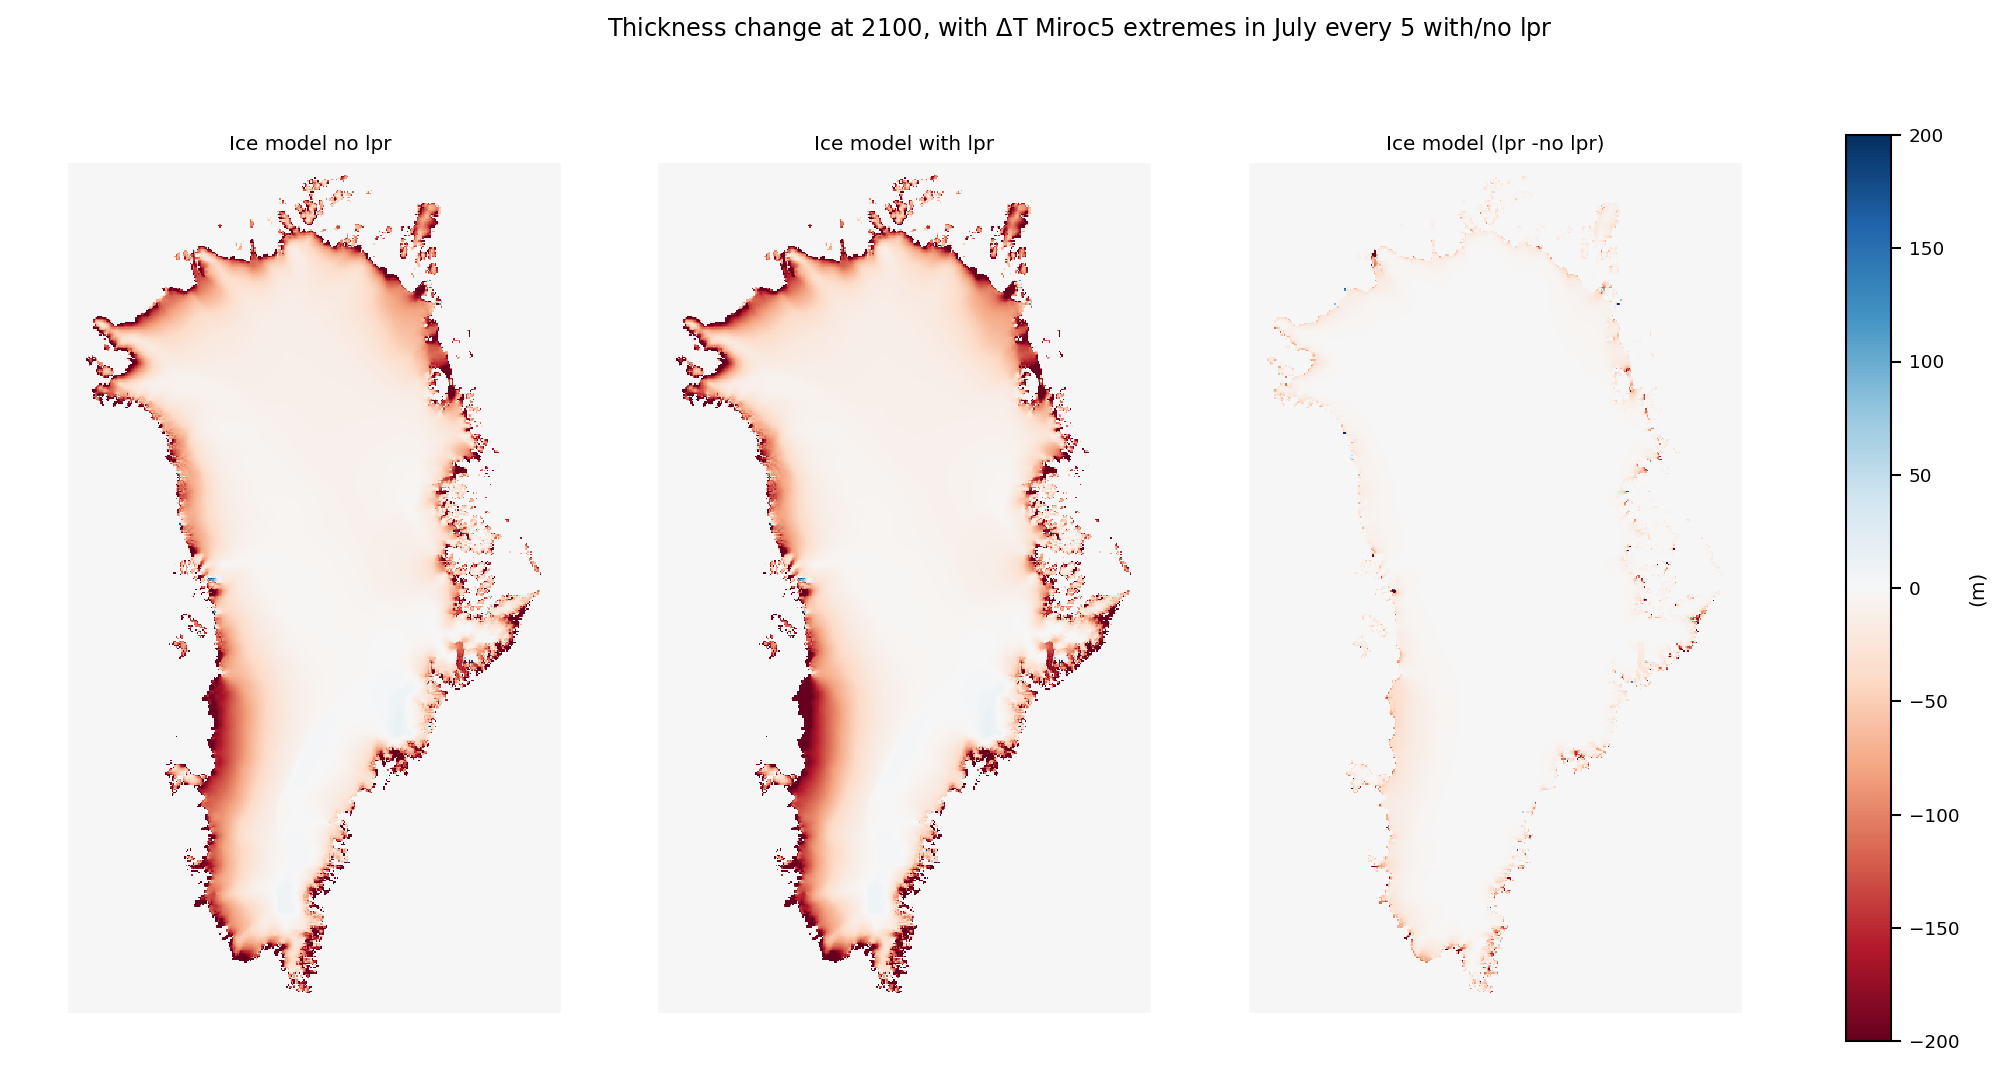

In [43]:
### extremes

file_lpr = files_dyn0[7]
file= files_dyn0[6]
file_no_mass= files[3]
thk0 = da.read_nc(output_proj + 'proj_step6K_330a_no_mass/'+'gris_4500.nc','thk')

thk1 = da.read_nc(output_proj+file+'y130gris_4500.nc','thk')
thk1_lpr = da.read_nc(output_proj+file_lpr+'y130gris_4500.nc','thk')
nn = np.load(output_proj + file_no_mass + 'calc_thickness_grounded_from_total_thickness.npz')
dthk1=nn['thk_last']
dthk0= nn['thk_0']
dthk1_extr = dthk1
thk1_extr = thk1



vvel = 200
f,ax =plt.subplots(1,3,figsize =(18,8),dpi=150)
f.suptitle('Thickness change at 2100, with $ \mathrm{\Delta T} $ Miroc5 extremes in July every 5 with/no lpr')

ax[0].set_title('Ice model no lpr ')
ax[1].set_title('Ice model with lpr')
ax[2].set_title('Ice model (lpr -no lpr)')
css=ax[0].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
# # plt.axis('off')

ax[0].set_axis_off()
css=ax[1].imshow( thk1_lpr.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)

# cs1=ax[1].imshow( dthk1-dthk0 ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
# plt.axis('off')
ax[1].set_axis_off()

cs2=ax[2].imshow( thk1_lpr.values[0,]- thk1.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
ax[2].set_axis_off()
# f.colorbar(css, ax = ax[0])
# f.colorbar(cs1, ax = ax[1])
f.colorbar(cs2,ax=ax.ravel().tolist(), label ='(m)')
plt.savefig(path_plot + 'prech_2d_Mirco5_dyn_e5_vs_dyn_e5_lpr.pdf')
plt.savefig(path_plot + 'prech_2d_Mirco5_dyn_e5_vs_dyn_e5_lp.png', transparent=True)
# plt.axis('off')